### Combined codes from us:

In [65]:
#Import module:
import numpy as np
from numpy.random import normal
import pandas as pd
import scipy
import scipy.stats as stats
from scipy.stats import norm, t
import matplotlib.pyplot as plt
import math
import datetime
import matplotlib.dates as mdate

### Question 1:

### Question 2:

a)

In [2]:
#2(a)
def VaR_pmf(x, alpha): 
# x as the pmf matrix and alpha represents the significant level
    x = np.array(x)
    x = x[x[:,0].argsort()]
    sum = 0 #initialize the cmf
    for i in range(len(x[:,1])):
        sum += x[i,1]
        if (sum >= alpha):
            return x[i,0]

b)

In [3]:
#Here a is a given array of  
def VaR(a,alpha):
    v = np.percentile(a,alpha)
    return v;

c)

In [13]:
#Problem 2, Part c
#The goal is to compute the V@R given L is distributed by a Normal Distribution or a Studnet-t Distribution (v dfs)
    #with mean mu and variance
#Inputs: (mu,variance,Distribution,alpha)
#Outputs: V@R_alpha(L)

def VAR(mu,variance,Dist_Type,alpha,df):
    if Dist_Type=="Gaussian":
        return mu+variance**(1/2)*scipy.stats.norm.ppf(alpha)
    if Dist_Type=="Student-t":
        return mu+variance**(1/2)*scipy.stats.t.ppf(alpha,df)
    
print(VAR(5,2,"Gaussian",0.95,4))
print(VAR(5,2,"Student-t",0.95,4))

7.326174307353348
8.014886631067212


### Question 3

a)

In [14]:
def ES_pmf(x, alpha):
    x = np.array(x)
    x = x[x[:,0].argsort()]
    sum = 0
    for i in range(len(x[:,1])):
        sum += x[i,1]
        if (alpha <= sum):
            ES = (sum - alpha) * x[i,0]
            for j in range(len(x[:,1]) - i - 1):
                ES += x[i+j+1,0]*x[i+j+1,1]
            return ES

b)

In [15]:
#Here a is the
def ES(a,alpha,npts):
    alpha_vec = np.linspace(alpha,1,npts,endpoint=True)
    stepsize = (1-alpha)/(npts-1)
    b = np.zeros(n);
    for i in range(0,npts):
        b[i]=VaR(a,alpha_vec[i])
    y = stepsize*sum(b)/(1-alpha)
    return y;

c)

In [16]:
#Problem 3, Part c
#The goal is to compute the ES of L distributed by those descibed in (2.c.)
#Inputs: (mu,variance,Distribution,alpha)
#Outputs: ES_alpha(L)

def ES(mu,variance,Dist_Type,alpha,df):
    if Dist_Type == "Gaussian":
        return mu+variance**(1/2)*(scipy.stats.norm.pdf(scipy.stats.norm.ppf(alpha)))/(1-alpha)
    if Dist_Type == "Student-t":
        return mu+variance**(1/2)*((scipy.stats.t.pdf(scipy.stats.t.ppf(alpha,df),df))/(1-alpha))*(df+(scipy.stats.t.ppf(alpha,df))**2)/(df-1)
    
print(ES(5,2,"Gaussian",0.95,4))
print(ES(5,2,"Student-t",0.95,4))

7.917116427657685
9.529542778084483


### Question 4

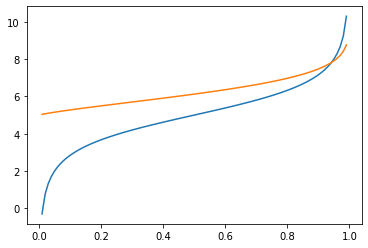

The limit of ES(N)/V@R(N) as alpha approaches 1 is:  1.0108703782591615
The limit of ES(t)/V@R(t) with v = 4 as alpha approaches 1 is:  1.3332414449842396
Differences from expected limits are due to numerical error


In [17]:
#Problem 4
#The goal is to use the functions of (2.c.) and (3.c.) to plot the graphs of V@R(L|t,df=4) and ES(L|Normal) as
    #as functions of alpha and who their limits approach 1 and df(df-1) respectfully.
#Inputs: (mu,variance,V@r_Distribution,ES_Distribution)
#Outputs: Graphs

def Prob4(mu,variance,df):
    alpha=[]
    n=100
    for a in range(n):
        alpha.append((a+1)/(n+1))
    es_gauss=[]
    var_stu=[]
    for a in range(n):
        es_gauss.append(ES(mu,variance,"Gaussian",alpha[a],df))
        var_stu.append(VAR(mu,variance,"Student-t",alpha[a],df))
    plt.plot(alpha,var_stu)
    plt.plot(alpha,es_gauss)
    plt.show()
    g_lim=1
    t_lim=df/(df-1)
    error = 100
    a=alpha[-1]
    while error > 0.011:
        a=0.5*(a+1)
        lg = ES(mu,variance,"Gaussian",a,df)/VAR(mu,variance,"Gaussian",a,df)
        error = abs(lg-g_lim)
    error = 100
    a=alpha[-1]
    while error > 0.0001:
        a=0.5*(a+1)
        lt = ES(mu,variance,"Student-t",a,df)/VAR(mu,variance,"Student-t",a,df)
        error = abs(lt-t_lim)
    print("The limit of ES(N)/V@R(N) as alpha approaches 1 is: ",lg)
    print("The limit of ES(t)/V@R(t) with v = 4 as alpha approaches 1 is: ",lt)
    
Prob4(5,2,4)
print("Differences from expected limits are due to numerical error")

### Question 5

In [18]:
#5
#c is a number, b and mu are d*1 vector, sigma is d*d matrix, alpha denotes significant level
def Risk_Multi(mu, sigma, c, b, alpha):
    mean_L = - c - np.dot(b.T, mu)
    var_L = np.dot(np.dot(b.T, sigma),b)
    sigma_L = np.sqrt(var_L)
    VaR_L = norm.ppf(1-alpha, mean_L, sigma_L)
    ES_L = mean_L + sigma_L* norm.pdf(norm.ppf(1-alpha))/(1-alpha)
    return VaR_L,ES_L

In [41]:
#Bonus

start_date = '1992-01-01'
end_date = '2019-12-31'
SP500 = data.get_data_yahoo('^GSPC', start_date, end_date)
SP500 = np.array(list(SP500['Adj Close']))

## log-return
LSP500 = np.diff(np.log(SP500))
LSP500 = LSP500[~np.isnan(LSP500)]

7052


In [43]:
## compute parameters
mu_LSP500 = np.mean(LSP500)
sigma_LSP500 = np.sqrt(np.var(LSP500))
print(mu_LSP500, sigma_LSP500)

## fit with norm and t
t_fit_param = t.fit(LSP500)
LSP500_fit_norm = normal(mu_LSP500, sigma_LSP500, len(LSP500))
LSP500_fit_t = t.rvs(t_fit_param[0],t_fit_param[1], t_fit_param[2], size = len(LSP500))

0.0002902395533315225 0.011080926203940003


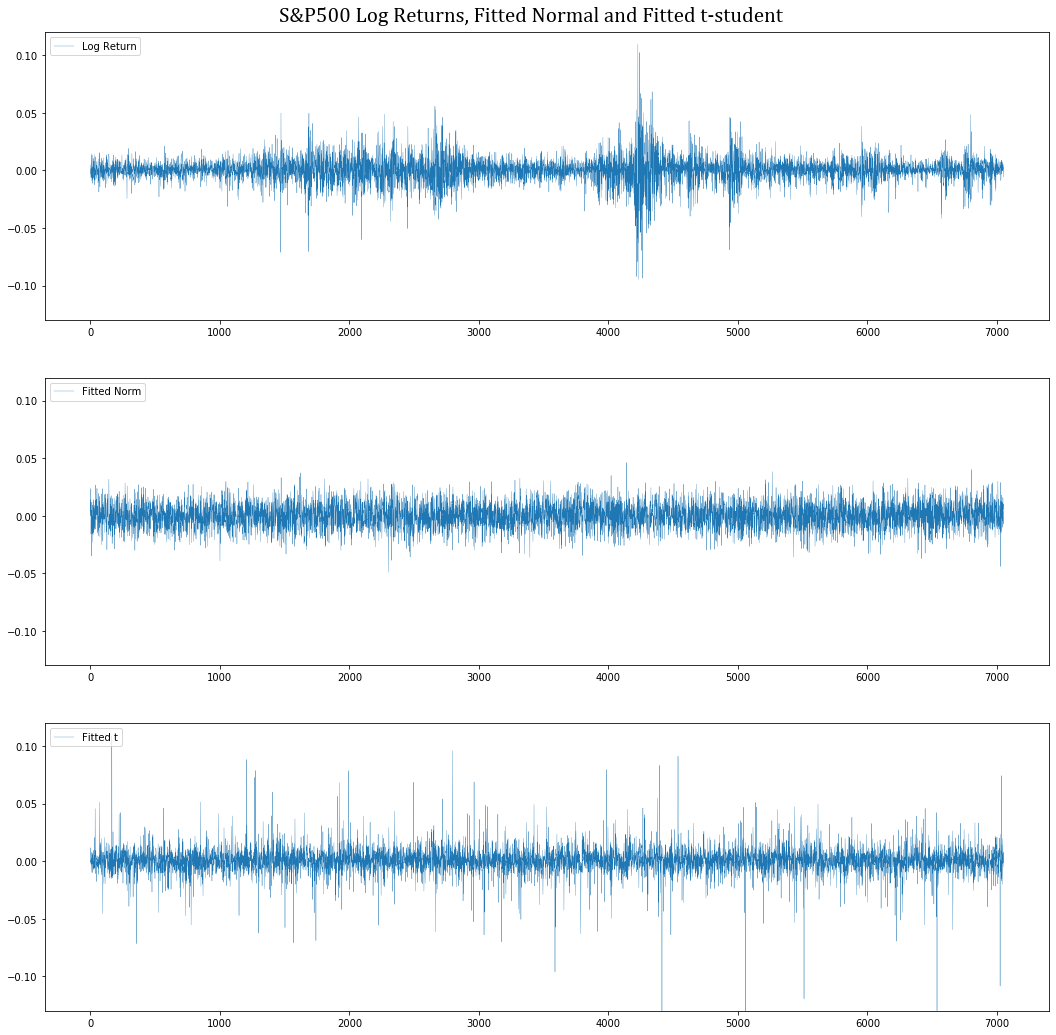

In [70]:
##graph 1


plt.figure(figsize=(18,18))
plt.suptitle(u'S&P500 Log Returns, Fitted Normal and Fitted t-student', y=0.9, fontsize=21, fontname="Cambria", fontweight='normal')

plt.subplot(3,1,1)
plt.plot(LSP500, label="Log Return", linewidth=0.3)
plt.ylim(ymin = -.13)
plt.ylim(ymax = .12)
plt.legend(loc='upper left')


plt.subplot(3,1,2)
plt.plot(LSP500_fit_norm, label="Fitted Norm", linewidth = 0.3)
plt.ylim(ymin = -.13)
plt.ylim(ymax = .12)
plt.legend(loc='upper left')


plt.subplot(3,1,3)
plt.plot(LSP500_fit_t, label="Fitted t", linewidth = 0.3)
plt.ylim(ymin = -.13)
plt.ylim(ymax = .12)
plt.legend(loc='upper left')

plt.show()

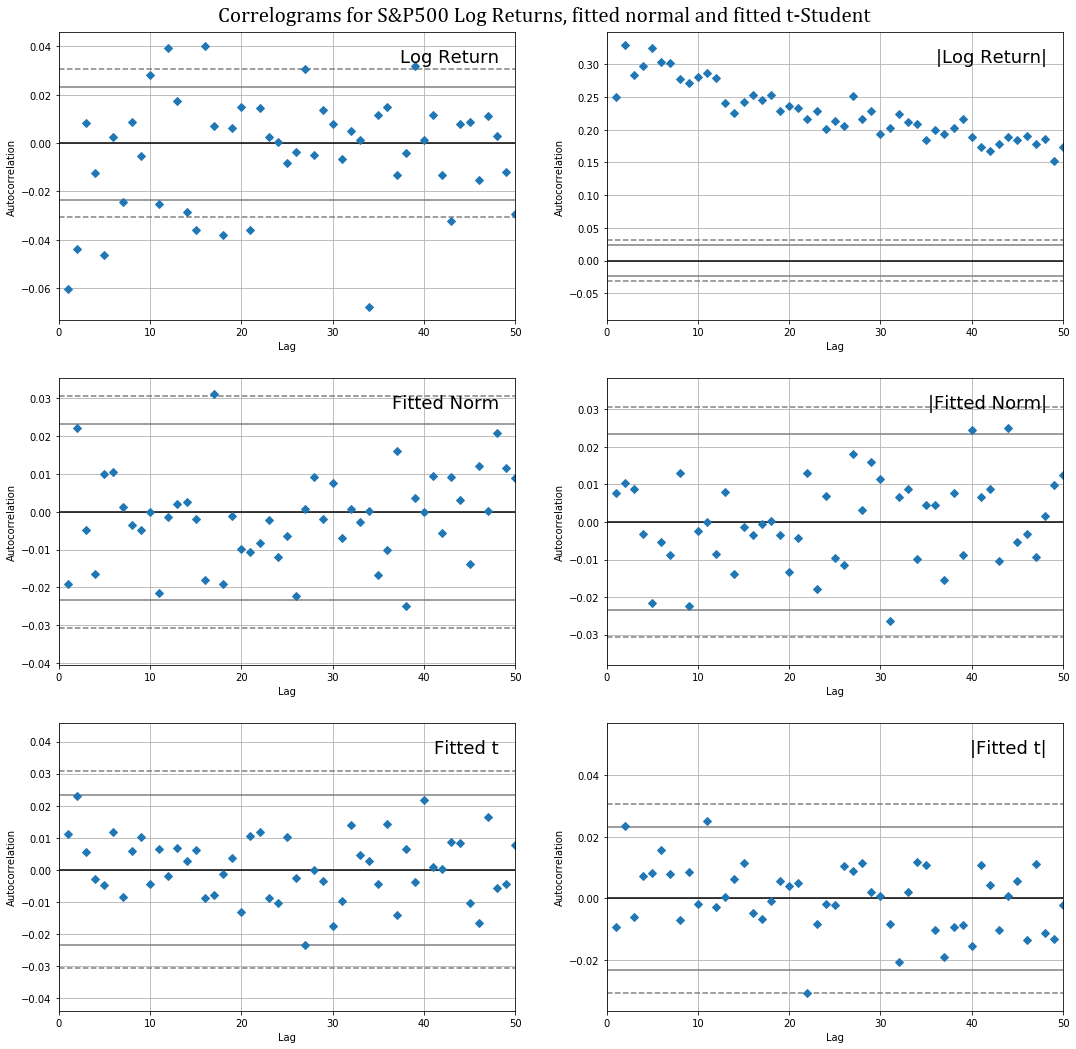

In [75]:
## correlograms

fig = plt.figure(figsize=(18,18))
fig.suptitle(u'Correlograms for S&P500 Log Returns, fitted normal and fitted t-Student', y=0.9, fontsize=21, fontname="Cambria", fontweight='normal')

pd_LSP500 = pd.DataFrame()
pd_LSP500['Log Return'] = LSP500 
pd_LSP500['Fitted Norm'] =  LSP500_fit_norm
pd_LSP500['Fitted t'] = LSP500_fit_t

for i in range(6):
    ax = plt.subplot(3,2,i+1)
    data_, legend = [pd_LSP500.iloc[:,i//2].abs(),'|' + pd_LSP500.columns[i//2]+'|'] if i%2 \
    else [pd_LSP500.iloc[:,i//2], pd_LSP500.columns[i//2]]
    
    pd.plotting.autocorrelation_plot(data_, ax=ax, linestyle="None", marker='D')
    plt.legend([legend], loc=1,handlelength=0, handletextpad=0, fontsize=18, frameon=False)
    plt.xlim(0, 50)
    
plt.show()    